# Install dependencies

In [32]:
!pip install git+https://github.com/graphsense/graphsense-python.git
import pandas as pd
import graphsense as gs
from graphsense.api import addresses_api, blocks_api, entities_api, general_api, txs_api, bulk_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/graphsense/graphsense-python.git to /tmp/pip-req-build-dqjfwpne
  Running command git clone --filter=blob:none --quiet https://github.com/graphsense/graphsense-python.git /tmp/pip-req-build-dqjfwpne
  Resolved https://github.com/graphsense/graphsense-python.git to commit 88fcdb52d9579f66b1422a7ff8367a52d75fe4b8
  Preparing metadata (setup.py) ... done


# Configure Client

In [ ]:
configuration = gs.Configuration(
    host = "https://api.ikna.io/",
    api_key = {
        'api_key': ""
    })


,address
0,1JwRp2J8bQcoG8XTUbxQZaEj9QB4RB6zEa
1,1EZS92K4xJbymDLwG4F7PNF5idPE62e9XY
2,16B4HuSAJ4WRdCq7dzA5b4ASh6QQ7ytZWB
3,1EdX5vtBiHGmkqbJc7VRSuVMx9Kpgh53Tp


# Read Seed Addresses



In [ ]:
addresses = pd.read_csv(
    "https://raw.githubusercontent.com/iknaio/iknaio-api-tutorial/main/data/sextortion_addresses.csv",
    header=None,
    names=["address"]
)
addresses.head(4)

# First Request - System State


In [ ]:
with gs.ApiClient(configuration) as api_client:
    api_instance = general_api.GeneralApi(api_client)
    api_response = api_instance.get_statistics()
    display(api_response)

# Read Address details for all seed addresses

In [ ]:
with gs.ApiClient(configuration) as api_client:
  blkapi = bulk_api.BulkApi(api_client)
  rcsv = blkapi.bulk_csv(
                  "btc",
                  "get_address", 
                  body = {
                      "address": addresses['address'].to_list()
                      },
                  num_pages = 1,
                  _preload_content=False
                  )


  df = pd.read_csv(rcsv)
df

,_error,_info,_request_address,actors,address,balance_eur,balance_usd,balance_value,currency,entity,...,status,token_balances,total_received_eur,total_received_usd,total_received_value,total_spent_eur,total_spent_usd,total_spent_value,total_tokens_received,total_tokens_spent
0,NaN,NaN,1PL9ewB1y3iC7EyuePDoPxJjwC4CgAvWTo,NaN,1PL9ewB1y3iC7EyuePDoPxJjwC4CgAvWTo,0.0,0.0,0,btc,434423451,...,clean,NaN,14249.31,16185.30,255413901,13982.02,15876.46,255413901,NaN,NaN
1,NaN,NaN,19i2Zn4QMg5y9gDTRfLyPXaw2zY3ikPzqg,NaN,19i2Zn4QMg5y9gDTRfLyPXaw2zY3ikPzqg,0.0,0.0,0,btc,429576138,...,clean,NaN,6733.00,7925.44,121250887,6743.34,7872.99,121250887,NaN,NaN
2,NaN,NaN,13DAd45ARMJW6th1cBuY1FwB9beVSzW77R,NaN,13DAd45ARMJW6th1cBuY1FwB9beVSzW77R,0.0,0.0,0,btc,434423451,...,clean,NaN,5230.63,6038.64,92269679,5280.18,6069.09,92269679,NaN,NaN
3,NaN,NaN,1BncH5WxBSYJ6mmcJC9bCRxQ6Z1evvtRxk,NaN,1BncH5WxBSYJ6mmcJC9bCRxQ6Z1evvtRxk,0.0,0.0,0,btc,446227209,...,clean,NaN,7806.30,8877.49,139420714,7885.37,8882.87,139420714,NaN,NaN
4,NaN,NaN,1HQ7wGdA5G9qUtM8jyDt5obDv1x3vEvjCy,NaN,1HQ7wGdA5G9qUtM8jyDt5obDv1x3vEvjCy,0.0,0.0,0,btc,434423451,...,clean,NaN,20056.30,22791.34,358995649,20221.39,22837.69,358995649,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,NaN,NaN,15FsDaUnH9YfHQ1W5n36iPJnhtU8Km2cax,NaN,15FsDaUnH9YfHQ1W5n36iPJnhtU8Km2cax,0.0,0.0,0,btc,440901668,...,clean,NaN,987.85,1131.15,17466824,987.52,1128.53,17466824,NaN,NaN
241,NaN,NaN,17ZERSZgd6GgtzdBrjZUKp82yVNVAGzq4M,NaN,17ZERSZgd6GgtzdBrjZUKp82yVNVAGzq4M,0.0,0.0,0,btc,434771350,...,clean,NaN,1831.10,2112.39,32252636,1827.63,2107.96,32252636,NaN,NaN
242,NaN,NaN,14mRSeeUCejfx323upnicNGDsiKv3sx4yW,NaN,14mRSeeUCejfx323upnicNGDsiKv3sx4yW,0.0,0.0,0,btc,445210782,...,clean,NaN,1088.76,1234.40,19524535,1088.76,1234.40,19524535,NaN,NaN
243,NaN,NaN,1A6fQU7wLzwXdvR2nsS4YtbEBKyNim82pq,NaN,1A6fQU7wLzwXdvR2nsS4YtbEBKyNim82pq,0.0,0.0,0,btc,449332788,...,clean,NaN,777.48,883.60,17860153,586.61,669.03,17860153,NaN,NaN


# Plot Data

<Axes: xlabel='total_received_eur', ylabel='total_spent_eur'>

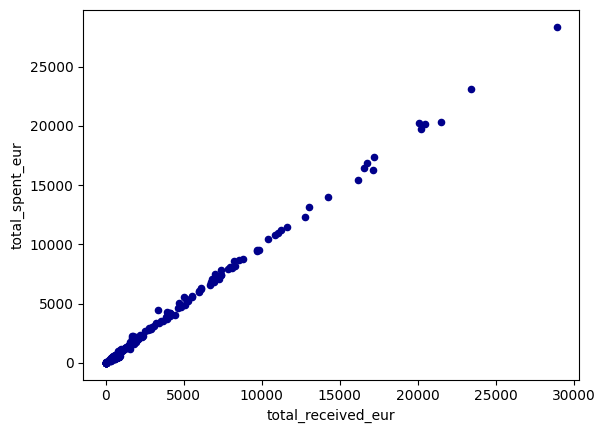

In [33]:
df.plot.scatter(x='total_received_eur',
                y='total_spent_eur',
                c='DarkBlue')